In [1]:
# to handel missing values
from sklearn.impute import SimpleImputer 

# to handel feature scaling
from sklearn.preprocessing import StandardScaler

# for ordinal encoding
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder

# to build pipeline

from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import pickle , os


import seaborn as sns
import matplotlib.pylab as plt

# setting figure size
plt.figure(figsize=(20,12))

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

In [2]:
# https://www.youtube.com/watch?v=2_7vRKawvEU

In [3]:
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#

In [20]:
# datapath = r"../../deliverytime_ML_model/data/processed/final_processed_data2.csv"

In [21]:
# df = pd.read_csv(r"../../deliverytime_ML_model/data/processed/final_processed_data2.csv")

In [22]:
df = pd.read_csv(r"D:\ineuron\practice\ML_projects\project_tasks\deliverytime_ML_model\data\processed\Delivery_data_proc_1.csv")

In [ ]:
# df = df.drop(columns=["Unnamed: 0"],axis=1)
# df = df.drop(columns=["Unnamed: 0","Vehicle_condition",'Time_Orderd_hour', 'Time_Orderd_minute', 'Time_Order_picked_hour', 'Time_Order_picked_minute'],axis=1)

In [ ]:

# Convert 'Time_Orderd_hour' to a datetime format
df['Time_Orderd_hour'] = pd.to_datetime(df['Time_Orderd_hour'], format='%H').dt.hour

# Map each hour to a time of day category
df['Time_of_day'] = pd.cut(df['Time_Orderd_hour'], bins=[0, 6, 12, 18, 24], labels=['Early Morning', 'Morning', 'Afternoon', 'Evening'])

# Create binary indicator variables for the new 'Time_of_day' variable
time_dummies = pd.get_dummies(df['Time_of_day'], prefix='Time_of_day')

# Concatenate the original dataframe with the new binary indicator variables
df_with_dummies = pd.concat([df, time_dummies], axis=1)


df_with_dummies.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,...,Time_Orderd_hour,Time_Orderd_minute,Time_Order_picked_hour,Time_Order_picked_minute,onground_dist,Time_of_day,Time_of_day_Early Morning,Time_of_day_Morning,Time_of_day_Afternoon,Time_of_day_Evening
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,...,21,55,22,10,13.5,Evening,0,0,0,1
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,...,14,55,22,10,8.6,Afternoon,0,0,1,0
2,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,...,9,20,22,10,21.5,Morning,0,1,0,0
3,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,...,19,50,22,10,4.7,Evening,0,0,0,1
4,29.0,4.5,Sandstorms,Jam,2,Buffet,electric_scooter,1.0,No,Metropolitian,...,20,25,22,10,31.4,Evening,0,0,0,1


In [ ]:
# df.to_csv(datapath)

In [23]:
df.columns

Index(['Unnamed: 0', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken (min)', 'Time_Orderd_hour', 'Time_Orderd_minute',
       'Time_Order_picked_hour', 'Time_Order_picked_minute',
       'onground_dist(KM)'],
      dtype='object')

In [ ]:
df.corr()

C:\Users\bagde.LAPTOP-2R7TU2TT\AppData\Local\Temp\ipykernel_13760\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),Time_Orderd_hour,Time_Orderd_minute,Time_Order_picked_hour,Time_Order_picked_minute,onground_dist
Delivery_person_Age,1.000000,-0.118796,-0.004174,0.109252,0.295565,0.002040,-0.000145,NaN,NaN,-0.037548
Delivery_person_Ratings,-0.118796,1.000000,0.042001,-0.124096,-0.366637,-0.068857,0.008397,NaN,NaN,0.015531
Vehicle_condition,-0.004174,0.042001,1.000000,-0.099321,-0.244523,0.008259,0.001157,NaN,NaN,0.016753
multiple_deliveries,0.109252,-0.124096,-0.099321,1.000000,0.379440,0.062170,0.000982,NaN,NaN,-0.015949
Time_taken (min),0.295565,-0.366637,-0.244523,0.379440,1.000000,0.181706,0.010561,NaN,NaN,-0.014663
Time_Orderd_hour,0.002040,-0.068857,0.008259,0.062170,0.181706,1.000000,-0.022629,NaN,NaN,-0.044451
Time_Orderd_minute,-0.000145,0.008397,0.001157,0.000982,0.010561,-0.022629,1.000000,NaN,NaN,-0.027790
Time_Order_picked_hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time_Order_picked_minute,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
onground_dist,-0.037548,0.015531,0.016753,-0.015949,-0.014663,-0.044451,-0.027790,NaN,NaN,1.000000


C:\Users\bagde.LAPTOP-2R7TU2TT\AppData\Local\Temp\ipykernel_13760\1420049753.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.histplot(df.corr())


<AxesSubplot: ylabel='Count'>

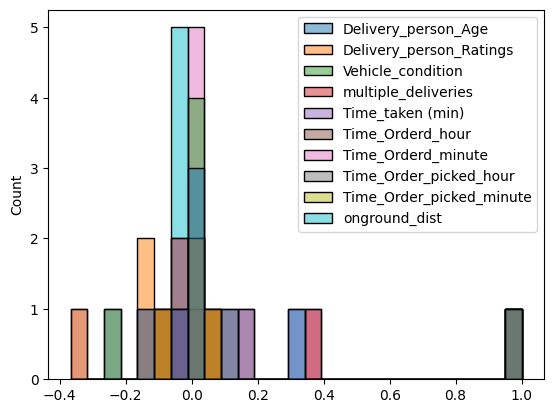

In [ ]:
sns.histplot(df.corr())

C:\Users\bagde.LAPTOP-2R7TU2TT\AppData\Local\Temp\ipykernel_13760\2157429118.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

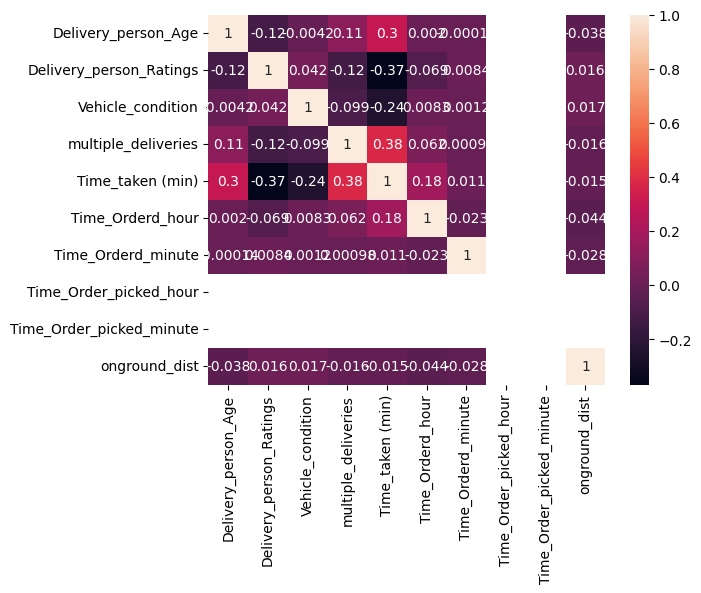

In [ ]:
sns.heatmap(df.corr(),annot=True)


In [ ]:
# Only certain columns so I don't need to deal with NaNs for now
X = df.drop('Time_taken (min)', axis=1)
y = df[["Time_taken (min)"]]

In [ ]:
catagorical_column = X.select_dtypes(include="object").columns
# numerical_columns = X.select_dtypes(exclude="object").columns
numerical_columns = X[['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition','multiple_deliveries', 'Time_Orderd_hour', 'Time_Orderd_minute','Time_Order_picked_hour', 'Time_Order_picked_minute', 'onground_dist']].columns

In [ ]:
df[catagorical_column].head()

,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City
0,Fog,Jam,Snack,motorcycle,No,Metropolitian
1,Stormy,High,Meal,motorcycle,No,Metropolitian
2,Sandstorms,Low,Buffet,motorcycle,No,Metropolitian
3,Fog,Jam,Snack,scooter,No,Metropolitian
4,Sandstorms,Jam,Buffet,electric_scooter,No,Metropolitian


column Weather_conditions : ['Fog' 'Stormy' 'Sandstorms' 'Windy' 'Cloudy' 'Sunny'] =============
  count :  6


column Road_traffic_density : ['Jam' 'High' 'Low' 'Medium'] ===============
  count :  4


column Type_of_order : ['Snack' 'Meal' 'Buffet' 'Drinks'] 
  count :  4


column Type_of_vehicle : ['motorcycle' 'scooter' 'electric_scooter'] 
  count :  3


column Festival : ['No' 'Yes'] ===============
  count :  2



column City : ['Metropolitian' 'Urban' 'Semi-Urban'] 
  count :  3

In [ ]:
wather_cat = ["Fog", "Stormy","Sandstorms","Windy", "Cloudy", "Sunny"]

traffic_cat = ['Low','Medium','High','Jam']

festival_cat = ['No', 'Yes']

#-------------------------------------------------------------------------#

typeoforder = ['Snack' 'Meal' 'Buffet' 'Drinks']

typeofvehicle = ['motorcycle' 'scooter' 'electric_scooter']

city = ['Metropolitian' 'Urban' 'Semi-Urban']

In [ ]:
numerical_columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'Time_Orderd_hour', 'Time_Orderd_minute',
       'Time_Order_picked_hour', 'Time_Order_picked_minute', 'onground_dist'],
      dtype='object')

In [ ]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [ ]:
cat_for_ord_columns = df[["Weather_conditions","Road_traffic_density", "Festival"]].columns
cat_for_ohe_columns = df[['Type_of_order', 'Type_of_vehicle', 'City']].columns


In [ ]:
cat_for_ohe_columns , cat_for_ord_columns

(Index(['Type_of_order', 'Type_of_vehicle', 'City'], dtype='object'),
 Index(['Weather_conditions', 'Road_traffic_density', 'Festival'], dtype='object'))

In [ ]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler(with_mean=False))

    ]

)

# Categorigal Pipeline
cat_pipeline1=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[wather_cat,traffic_cat,festival_cat])),
    ('scaler',StandardScaler(with_mean=False))
    ]

)

cat_pipeline2 = Pipeline(
    steps=[('imputer',SimpleImputer(strategy='most_frequent')),
           ("ohe", OneHotEncoder(categories=[typeoforder,typeofvehicle,city],handle_unknown="ignore")),
           ('scaler',StandardScaler(with_mean=False))]
)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline1',cat_pipeline1,cat_for_ord_columns),
("cat_pipeline2", cat_pipeline2,cat_for_ohe_columns)
])


In [ ]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'Time_Orderd_hour', 'Time_Orderd_minute',
       'Time_Order_picked_hour', 'Time_Order_picked_minute', 'ongrou...
                                ('cat_pipeline2',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(categories=[['SnackMealBuffetDrinks'],
                                                                            ['motorcyclescooterelectric_scooter'],
                                                                            ['MetropolitianUrbanSemi-Urban']],
                                                                handle_unknown='ignore')),
                                                 ('scaler',
                                                  StandardScaler(with_mean=False))]),
                                 Index(['Type_of_order', 'Type_of_vehicle', 'City'], dtype='object'))])

In [ ]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((17309, 16), (7419, 16), (17309, 1), (7419, 1))

In [ ]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'Evening'

In [ ]:
X_train.head()

,num_pipeline__Delivery_person_Age,num_pipeline__Delivery_person_Ratings,num_pipeline__Vehicle_condition,num_pipeline__multiple_deliveries,num_pipeline__Time_Orderd_hour,num_pipeline__Time_Orderd_minute,num_pipeline__Time_Order_picked_hour,num_pipeline__Time_Order_picked_minute,num_pipeline__onground_dist,cat_pipeline1__Weather_conditions,cat_pipeline1__Road_traffic_density,cat_pipeline1__Festival,cat_pipeline2__Type_of_order_SnackMealBuffetDrinks,cat_pipeline2__Type_of_vehicle_motorcyclescooterelectric_scooter,cat_pipeline2__City_MetropolitianUrbanSemi-Urban
0,6.589105,15.188992,0.000000,1.745201,5.137909,2.566552,22.0,10.0,8.608607,2.923860,0.0,0.0,0.0,0.0,0.0
1,5.375322,15.821867,1.224499,1.745201,5.137909,1.833251,22.0,10.0,8.608607,2.923860,0.0,0.0,0.0,0.0,0.0
2,6.068912,15.505429,1.224499,0.000000,2.233873,2.933202,22.0,10.0,8.608607,2.923860,0.0,0.0,0.0,0.0,0.0
3,3.467950,14.239680,2.448998,1.745201,2.010486,2.933202,22.0,10.0,8.608607,2.339088,0.0,0.0,0.0,0.0,0.0
4,3.467950,14.556117,2.448998,1.745201,4.914521,1.833251,22.0,10.0,8.608607,2.339088,0.0,0.0,0.0,0.0,0.0


In [ ]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
regression.coef_

array([[ 2.17651218e+00, -2.44662265e+00, -1.87880176e+00,
         2.08918239e+00,  6.65252233e-01,  1.18136439e-02,
         1.11022302e-16, -1.11022302e-16, -2.41598483e-02,
        -1.07967320e+00,  3.00206481e+00,  1.54772351e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

## Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 6.579150347706401
MAE: 5.235414036219712
R2 score 49.83068597754461


Lasso
Model Training Performance
RMSE: 6.987092739463092
MAE: 5.5815308782610495
R2 score 43.416272177547064


Ridge
Model Training Performance
RMSE: 6.579147825777416
MAE: 5.235413148348476
R2 score 49.830724439478516


Elasticnet
Model Training Performance
RMSE: 7.04491115574893
MAE: 5.642552543545759
R2 score 42.47593322006308




In [ ]:
y_pred=model.predict(X_test)
y_pred

array([23.98241613, 20.90137223, 27.88457741, ..., 29.74089673,
       27.18920533, 28.45677247])

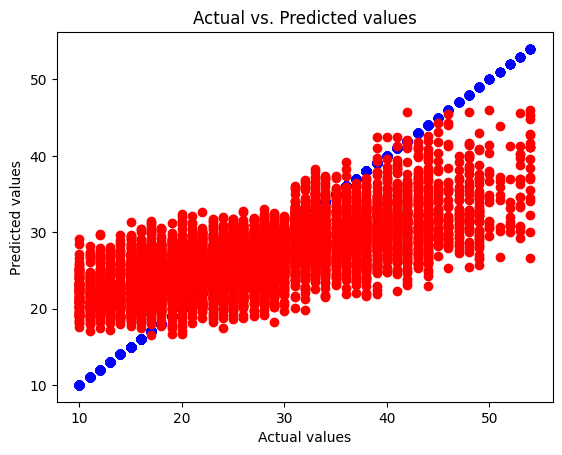

In [ ]:
import matplotlib.pyplot as plt

# plot the actual values
plt.scatter(y_test, y_test, color='blue')

# plot the predicted values
plt.scatter(y_test, y_pred, color='red')

# add labels and title
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs. Predicted values')

# show the plot
plt.show()

In [26]:
df = pd.read_csv(r"D:\ineuron\practice\ML_projects\project_tasks\deliverytime_ML_model\data\processed\Processed_Delivery_data_WithDist.csv")

In [27]:
df = df.drop(labels=["Unnamed: 0"],axis=1)

In [28]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Daytime,Time_Difference_Minutes,Order_Hour,Order_Minute,Picked_Hour,Picked_Minute,onground_dist(KM)
0,36,4.2,Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,46,night,15,21,55,22,10,12.7
1,21,4.7,Stormy,High,1,Meal,motorcycle,1,No,Metropolitian,23,afternoon,10,14,55,15,5,8.6
2,34,4.3,Sandstorms,Low,0,Buffet,motorcycle,0,No,Metropolitian,20,morning,10,9,20,9,30,4.7
3,24,4.7,Fog,Jam,1,Snack,scooter,1,No,Metropolitian,41,evening,15,19,50,20,5,32.8
4,29,4.5,Sandstorms,Jam,2,Buffet,electric_scooter,1,No,Metropolitian,20,evening,10,20,25,20,35,21.6


In [30]:
num_col = df.select_dtypes(exclude="object")
cat_col = df.select_dtypes(include="object")

C:\Users\bagde.LAPTOP-2R7TU2TT\AppData\Local\Temp\ipykernel_15500\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

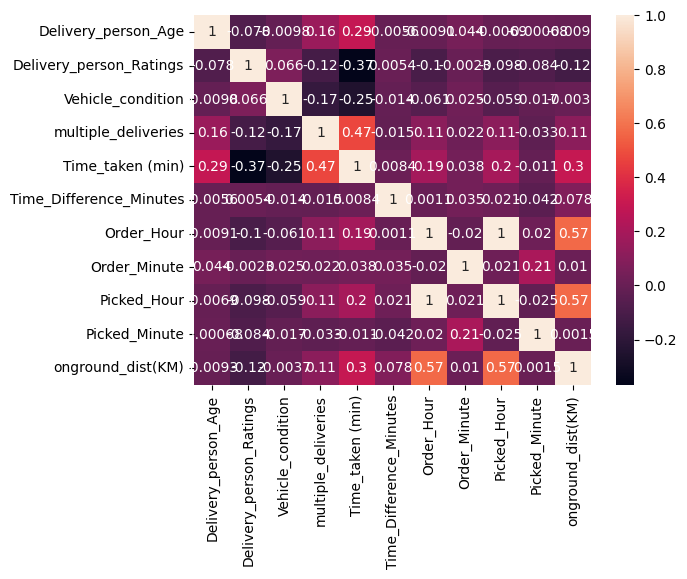

In [29]:
sns.heatmap(df.corr(),annot=True)

C:\Users\bagde.LAPTOP-2R7TU2TT\AppData\Local\Temp\ipykernel_15500\1552331597.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


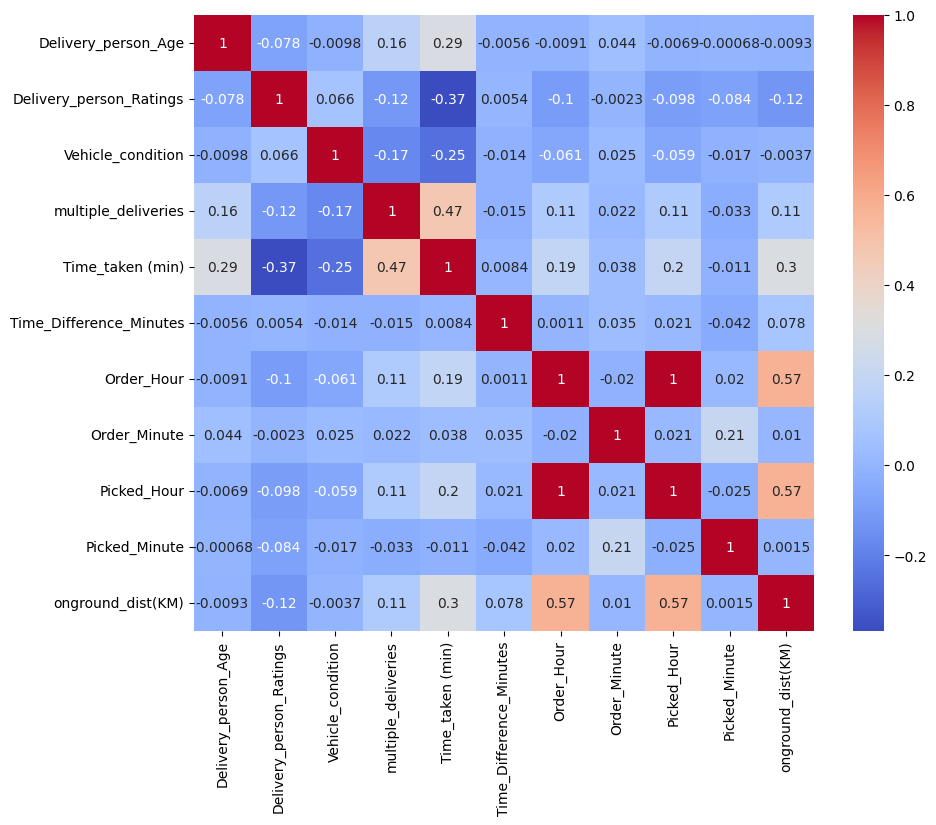

In [36]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate correlation matrix and display heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()




In [38]:
independent_variable_1 = df.drop('Time_taken (min)', axis=1)
dependent_variable = df[["Time_taken (min)"]]

In [41]:
# Create scatter plot of independent variable 1 and dependent variable
sns.scatterplot(x=independent_variable_1, y=dependent_variable, data=df)
plt.show()



ValueError: If using all scalar values, you must pass an index

In [ ]:
# Create box plots of independent variables by dependent variable categories
sns.boxplot(x='dependent_variable_category', y='independent_variable_1', data=df)
sns.boxplot(x='dependent_variable_category', y='independent_variable_2', data=df)
plt.show()



In [ ]:
# Calculate mean and standard deviation of independent variable 1 by dependent variable categories
mean_by_category = df.groupby('dependent_variable_category')['independent_variable_1'].mean()
std_by_category = df.groupby('dependent_variable_category')['independent_variable_1'].std()

# Plot mean and standard deviation as error bars on bar chart
plt.bar(mean_by_category.index, mean_by_category.values, yerr=std_by_category.values)
plt.show()

In [34]:
# Set default figure size for all plots
plt.rcParams['figure.figsize'] = [10, 8]

C:\Users\bagde.LAPTOP-2R7TU2TT\AppData\Local\Temp\ipykernel_15500\1293605318.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


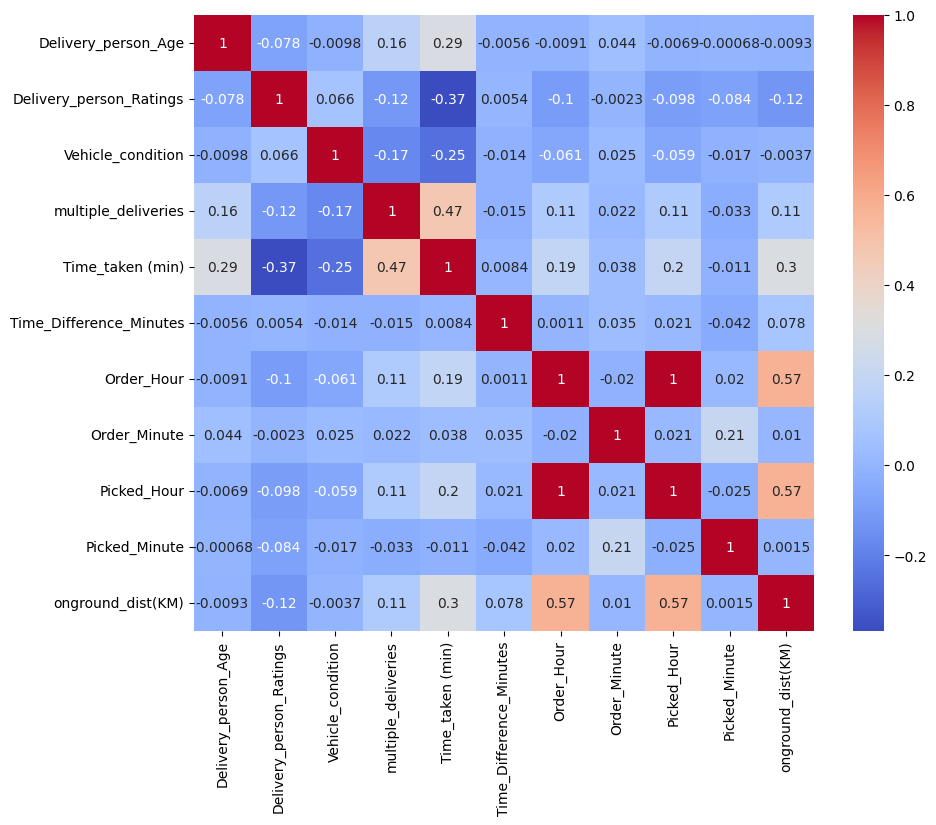

ValueError: Could not interpret value `independent_variable_1` for parameter `x`

<Figure size 1000x800 with 0 Axes>

In [35]:
# Calculate correlation matrix and display heatmap with adjusted size
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Create scatter plot of independent variable 1 and dependent variable with adjusted size
plt.figure(figsize=(10,8))
sns.scatterplot(x='independent_variable_1', y='dependent_variable', data=df)
plt.show()